In [2]:
import tensorflow as tf

In [3]:
tf.reset_default_graph()
a = tf.add(2, 3)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(a))
sess.close()

5


In [5]:
a = tf.add(3, 5)
with tf.Session() as sess:
    print(sess.run(a))

8


In [6]:
tf.reset_default_graph()
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.mul(x, y)
useless = tf.mul(x, op1)
op3 = tf.pow(op2, op1)

with tf.Session() as sess:
    print(sess.run([op3, useless]))

[7776, 10]


In [7]:
tf.reset_default_graph()
with tf.device('/cpu:0'):
    a = tf.constant([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]], name='a')
    b = tf.transpose([[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]], name='b')
    c = tf.matmul(a, b)
    
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(sess.run(c))

[[ 91.]]


In [8]:
tf.reset_default_graph()
g = tf.Graph()
with g.as_default():
    x = tf.add(3, 5)

with tf.Session(graph=g) as sess:
    print(sess.run(x))

8


In [9]:
tf.reset_default_graph()
a = tf.constant(2, name="a")
b = tf.constant(3, name="b")
x = tf.add(a, b)
print(x)
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(x))
writer.close()

Tensor("Add:0", shape=(), dtype=int32)
5


In [10]:
tf.reset_default_graph()
a = tf.constant([2, 2], name="vector")
b = tf.constant([[0, 1], [2, 3]], name="b")

In [11]:
print(a)
print(tf.zeros([2, 3], tf.int32))


Tensor("vector:0", shape=(2,), dtype=int32)
Tensor("zeros:0", shape=(2, 3), dtype=int32)


In [12]:
print(tf.zeros_like(a))
print(tf.ones([2,3]))
print(tf.ones_like([a]))
print(tf.fill([2, 3], 8))

Tensor("zeros_like:0", shape=(2,), dtype=int32)
Tensor("ones:0", shape=(2, 3), dtype=float32)
Tensor("ones_like:0", shape=(1, 2), dtype=int32)
Tensor("Fill:0", shape=(2, 3), dtype=int32)


In [13]:
with tf.Session() as sess:
    a = tf.linspace(10.0, 13.0, 4, name="linspace")
    print(sess.run(a))
    b = tf.range(3, 18, 1)
    print(b.eval())
    

[ 10.  11.  12.  13.]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [14]:
tf.reset_default_graph()

my_const = tf.constant([1.0, 2.0], name="my_cost")
print(tf.get_default_graph().as_graph_def())

node {
  name: "my_cost"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
          dim {
            size: 2
          }
        }
        tensor_content: "\000\000\200?\000\000\000@"
      }
    }
  }
}
versions {
  producer: 17
}



In [15]:
a = tf.Variable(2, name="scalar")
b = tf.Variable([2, 3], name="vector")
print(a)
print(b)

Tensor("scalar/read:0", shape=(), dtype=int32)
Tensor("vector/read:0", shape=(2,), dtype=int32)


In [16]:
x = tf.Variable(10, name="x")
print(x.initializer)

name: "x/Assign"
op: "Assign"
input: "x"
input: "x/initial_value"
attr {
  key: "T"
  value {
    type: DT_INT32
  }
}
attr {
  key: "_class"
  value {
    list {
      s: "loc:@x"
    }
  }
}
attr {
  key: "use_locking"
  value {
    b: true
  }
}
attr {
  key: "validate_shape"
  value {
    b: true
  }
}



In [17]:
tf.reset_default_graph()
x = tf.Variable(10, name="x")

init = tf.global_variables_initializer()
with tf.Session() as sess:
    print(sess.run(init))
    
init_x = tf.variables_initializer([x], name="init_x")
with tf.Session() as sess:
    print(sess.run(init_x))

None
None


In [18]:
W = tf.Variable(tf.truncated_normal([700, 10]))
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W.eval())

[[-0.67973882  1.67592382 -0.19071345 ..., -0.14574654 -0.44223377
   0.74218744]
 [-0.54146373  0.02901861  1.43578041 ...,  1.01705205 -0.57781988
   1.22830677]
 [-0.423354    0.05386667 -0.49277624 ...,  0.11439822  0.68545997
   1.40931845]
 ..., 
 [ 0.82350218 -0.14894831  0.83606714 ...,  1.39919233 -0.03350252
  -0.09442876]
 [-1.65446961  1.38988781 -0.29375669 ...,  0.18888779  0.207692
  -1.00480795]
 [-1.29408026 -0.37106529 -0.04787628 ..., -0.38714463  0.53728181
   0.46684763]]


In [19]:
tf.reset_default_graph()
W = tf.Variable(10)
assign_op = W.assign(100)
with tf.Session() as sess:
    sess.run(W.initializer)
    print(W.eval())
    sess.run(assign_op)
    print(W.eval())
    

10
100


In [20]:
tf.reset_default_graph()

a = tf.Variable(2, name="a")
a_times_two_op = a.assign(a * 2)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(a_times_two_op))
    print(sess.run(a_times_two_op))
    print(sess.run(a_times_two_op))    

4
8
16


In [21]:
tf.reset_default_graph()

sess = tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
print(c.eval())
sess.close()

30.0


In [22]:
tf.reset_default_graph()

a = tf.placeholder(tf.float32, shape=[3])
b = tf.constant([5, 5, 5], tf.float32)

c = a + b

with tf.Session() as sess:
    print(sess.run(c, {a:[1, 2, 3]}))
    writer = tf.summary.FileWriter('./my_graph', sess.graph)


[ 6.  7.  8.]


In [23]:
x = tf.Variable(10, name="x")
y = tf.Variable(20, name="y")
z = tf.add(x, y)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(10):
        print(sess.run(z))

30
30
30
30
30
30
30
30
30
30


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

tf.reset_default_graph()
DATA_FILE = 'data/fire_theft.xls'

# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1
print(data)
print(data[:,0])


[[   6.2   29. ]
 [   9.5   44. ]
 [  10.5   36. ]
 [   7.7   37. ]
 [   8.6   53. ]
 [  34.1   68. ]
 [  11.    75. ]
 [   6.9   18. ]
 [   7.3   31. ]
 [  15.1   25. ]
 [  29.1   34. ]
 [   2.2   14. ]
 [   5.7   11. ]
 [   2.    11. ]
 [   2.5   22. ]
 [   4.    16. ]
 [   5.4   27. ]
 [   2.2    9. ]
 [   7.2   29. ]
 [  15.1   30. ]
 [  16.5   40. ]
 [  18.4   32. ]
 [  36.2   41. ]
 [  39.7  147. ]
 [  18.5   22. ]
 [  23.3   29. ]
 [  12.2   46. ]
 [   5.6   23. ]
 [  21.8    4. ]
 [  21.6   31. ]
 [   9.    39. ]
 [   3.6   15. ]
 [   5.    32. ]
 [  28.6   27. ]
 [  17.4   32. ]
 [  11.3   34. ]
 [   3.4   17. ]
 [  11.9   46. ]
 [  10.5   42. ]
 [  10.7   43. ]
 [  10.8   34. ]
 [   4.8   19. ]]
[  6.2   9.5  10.5   7.7   8.6  34.1  11.    6.9   7.3  15.1  29.1   2.2
   5.7   2.    2.5   4.    5.4   2.2   7.2  15.1  16.5  18.4  36.2  39.7
  18.5  23.3  12.2   5.6  21.8  21.6   9.    3.6   5.   28.6  17.4  11.3
   3.4  11.9  10.5  10.7  10.8   4.8]


In [25]:
# step 2
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [26]:
# step 3
W = tf.Variable(initial_value=0, name="W", dtype=tf.float32)
b = tf.Variable(initial_value=0, name="b", dtype=tf.float32)

In [27]:
Y_predicted = X * W + b

In [28]:
loss = tf.square(Y - Y_predicted, name="loss")

In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [30]:
with tf.Session() as sess:
    
# Step 7: initialize the necessary variables, in this case, w and b
    init = tf.global_variables_initializer()
    sess.run(init)
    writer = writer = tf.summary.FileWriter('./my_graph/03/liniear_reg', sess.graph)

    # Step 8: train the model
    for i in range(500):
        total_loss = 0
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss
            # TO DO: write sess.run()
            _, l = sess.run([optimizer, loss], {X: x, Y: y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
    w_value, b_value = sess.run([W, b])

Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

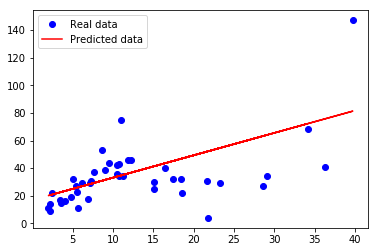

In [31]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

In [32]:
"""
Simple TensorFlow exercises
You should thoroughly test your code
"""

import tensorflow as tf

tf.reset_default_graph()

###############################################################################
# 1a: Create two random 0-d tensors x and y of any distribution.
# Create a TensorFlow object that returns x + y if x > y, and x - y otherwise.
# Hint: look up tf.cond()
# I do the first problem for you
###############################################################################

x = tf.random_uniform([])  # Empty array as shape creates a scalar.
y = tf.random_uniform([])
out = tf.cond(tf.less(x, y), lambda: tf.add(x, y), lambda: tf.sub(x, y))
with tf.Session() as sess:
    print("1a", sess.run(out))

###############################################################################
# 1b: Create two 0-d tensors x and y randomly selected from -1 and 1.
# Return x + y if x < y, x - y if x > y, 0 otherwise.
# Hint: Look up tf.case().
###############################################################################

x1 = tf.random_uniform([], minval=1, maxval=1)
y1 = tf.random_uniform([], minval=1, maxval=1)
out1 = tf.case({tf.less(x1, y1): lambda: tf.add(x1, y1),
                tf.greater(x1, y1): lambda: tf.sub(x1, y1)},
               exclusive=True,
               default=lambda: tf.constant(0, dtype=tf.float32),
               name="case")
with tf.Session() as sess:
    print("1b", sess.run(out1))

###############################################################################
# 1c: Create the tensor x of the value [[0, -2, -1], [0, 1, 2]] 
# and y as a tensor of zeros with the same shape as x.
# Return a boolean tensor that yields Trues if x equals y element-wise.
# Hint: Look up tf.equal().
###############################################################################

x2 = tf.constant([[0, -2, -1], [0, 1, 2]], dtype=tf.float64)
y2 = tf.zeros(3, 2)
out2 = tf.equal(x2, y2)
with tf.Session() as sess:
    print("1c", sess.run(out2))

###############################################################################
# 1d: Create the tensor x of value 
# [29.05088806,  27.61298943,  31.19073486,  29.35532951,
#  30.97266006,  26.67541885,  38.08450317,  20.74983215,
#  34.94445419,  34.45999146,  29.06485367,  36.01657104,
#  27.88236427,  20.56035233,  30.20379066,  29.51215172,
#  33.71149445,  28.59134293,  36.05556488,  28.66994858].
# Get the indices of elements in x whose values are greater than 30.
# Hint: Use tf.where().
# Then extract elements whose values are greater than 30.
# Hint: Use tf.gather().
###############################################################################

x = tf.constant([
    29.05088806,  27.61298943,  31.19073486,  29.35532951,
    30.97266006,  26.67541885,  38.08450317,  20.74983215,
    34.94445419,  34.45999146,  29.06485367,  36.01657104,
    27.88236427,  20.56035233,  30.20379066,  29.51215172,
    33.71149445,  28.59134293,  36.05556488,  28.66994858])

indices = tf.where(tf.greater(x, 30))
values = tf.gather(x, indices)
with tf.Session() as sess:
    print("1d", sess.run([indices, values]))


###############################################################################
# 1e: Create a diagnoal 2-d tensor of size 6 x 6 with the diagonal values of 1,
# 2, ..., 6
# Hint: Use tf.range() and tf.diag().
###############################################################################

ranges = tf.range(1, 6)
out = tf.diag(ranges)
with tf.Session() as sess:
    print("1e", sess.run([ranges, out]))

###############################################################################
# 1f: Create a random 2-d tensor of size 10 x 10 from any distribution.
# Calculate its determinant.
# Hint: Look at tf.matrix_determinant().
###############################################################################

x = tf.random_uniform((10, 10))
with tf.Session() as sess:
    print("1f", sess.run([x, tf.matrix_determinant(x)]))

###############################################################################
# 1g: Create tensor x with value [5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9].
# Return the unique elements in x
# Hint: use tf.unique(). Keep in mind that tf.unique() returns a tuple.
###############################################################################

x = tf.constant([5, 2, 3, 5, 10, 6, 2, 3, 4, 2, 1, 1, 0, 9])
with tf.Session() as sess:
    print("1g", sess.run([x, tf.unique(x)])[0])



1a 0.526012
1b 0.0
1c [[ True False False]
 [ True False False]]
1d [array([[ 2],
       [ 4],
       [ 6],
       [ 8],
       [ 9],
       [11],
       [14],
       [16],
       [18]]), array([[ 31.19073486],
       [ 30.97266006],
       [ 38.08450317],
       [ 34.94445419],
       [ 34.45999146],
       [ 36.01657104],
       [ 30.20379066],
       [ 33.71149445],
       [ 36.05556488]], dtype=float32)]
1e [array([1, 2, 3, 4, 5], dtype=int32), array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]], dtype=int32)]
1f [array([[ 0.34534502,  0.82925189,  0.21526563,  0.57343876,  0.31970906,
         0.64633453,  0.08908033,  0.99385345,  0.19428527,  0.93551767],
       [ 0.42690301,  0.28044963,  0.02792346,  0.51211035,  0.88860786,
         0.33595657,  0.37886655,  0.16072166,  0.34818399,  0.07799566],
       [ 0.7742579 ,  0.32868195,  0.26638508,  0.44240415,  0.10927701,
         0.19124532,  0.7937572 ,  0.2462

In [33]:
###############################################################################
# 1h: Create two tensors x and y of shape 300 from any normal distribution,
# as long as they are from the same distribution.
# Use tf.less() and tf.select() to return:
# - The mean squared error of (x - y) if the average of all elements in (x - y)
#   is negative, or
# - The sum of absolute value of all elements in the tensor (x - y) otherwise.
# Hint: see the Huber loss function in the lecture slides 3.
###############################################################################

x = tf.random_uniform([3])
y = tf.random_uniform([3])
mean = tf.reduce_mean(x)
condition = tf.less(mean, 0)
error = tf.reduce_mean(tf.square(x - y))

selector = tf.select(condition, error, tf.reduce_sum(tf.abs(x - y)))
with tf.Session() as sess:
    print("1h", sess.run([x, y, selector]))

1h [array([ 0.68748057,  0.04837799,  0.17514455], dtype=float32), array([ 0.10534561,  0.39624679,  0.74295247], dtype=float32), 1.4978117]


In [34]:
tf.reset_default_graph()

"""
Starter code for logistic regression model to solve OCR task 
with MNIST in TensorFlow
MNIST dataset: yann.lecun.com/exdb/mnist/
"""

import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import time

# Define paramaters for the model
learning_rate = 0.01
batch_size = 128
n_epochs = 25

# Step 1: Read in data
# using TF Learn's built in function to load MNIST data to the folder data/mnist
mnist = input_data.read_data_sets('data/mnist', one_hot=True) 



Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz


In [35]:
# Step 2: create placeholders for features and labels
# each image in the MNIST data is of shape 28*28 = 784
# therefore, each image is represented with a 1x784 tensor
# there are 10 classes for each image, corresponding to digits 0 - 9.

X = tf.placeholder(tf.float32, [batch_size, 784], name="image")
Y = tf.placeholder(tf.float32, [batch_size, 10], name="label")

In [36]:
# Step 3: create weights and bias
# weights and biases are initialized to 0
# shape of w depends on the dimension of X and Y so that Y = X * w + b
# shape of b depends on Y

w = tf.Variable(tf.zeros([784, 10]), name="w", dtype=tf.float32)
b = tf.Variable(tf.zeros([batch_size, 10]), name="b", dtype=tf.float32)

In [37]:
# the model that returns the logits.
# this logits will be later passed through softmax layer
# to get the probability distribution of possible label of the image
# DO NOT DO SOFTMAX HERE
logits = tf.matmul(X, w) + b


In [38]:
# Step 5: define loss function
# use cross entropy loss of the real labels with the softmax of logits
# use the method:
# tf.nn.softmax_cross_entropy_with_logits(logits, Y)
# then use tf.reduce_mean to get the mean loss of the batch
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, Y))


In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [40]:
with tf.Session() as sess:
	start_time = time.time()
	sess.run(tf.global_variables_initializer())	
	n_batches = int(mnist.train.num_examples/batch_size)
	for i in range(n_epochs): # train the model n_epochs times
		total_loss = 0

		for _ in range(n_batches):
			X_batch, Y_batch = mnist.train.next_batch(batch_size)
			# TO-DO: run optimizer + fetch loss_batch
			_, loss_batch = sess.run([optimizer, loss], {X: X_batch, Y: Y_batch})
			total_loss += loss_batch
		print('Average loss epoch {0}: {1}'.format(i, total_loss/n_batches))

	print('Total time: {0} seconds'.format(time.time() - start_time))

	print('Optimization Finished!') # should be around 0.35 after 25 epochs

	# test the model
	n_batches = int(mnist.test.num_examples/batch_size)
	total_correct_preds = 0
	for i in range(n_batches):
		X_batch, Y_batch = mnist.test.next_batch(batch_size)
		_, loss_batch, logits_batch = sess.run([optimizer, loss, logits], feed_dict={X: X_batch, Y:Y_batch}) 
		preds = tf.nn.softmax(logits_batch)
		correct_preds = tf.equal(tf.argmax(preds, 1), tf.argmax(Y_batch, 1))
		accuracy = tf.reduce_sum(tf.cast(correct_preds, tf.float32)) # need numpy.count_nonzero(boolarr) :(
		total_correct_preds += sess.run(accuracy)	
	
	print('Accuracy {0}'.format(total_correct_preds/mnist.test.num_examples))

Average loss epoch 0: 2.097315984172421
Average loss epoch 1: 1.765452989331492
Average loss epoch 2: 1.5246752631136309
Average loss epoch 3: 1.3485371032794873
Average loss epoch 4: 1.216713368475854
Average loss epoch 5: 1.1160752795515083
Average loss epoch 6: 1.0364799481449705
Average loss epoch 7: 0.9728833074336285
Average loss epoch 8: 0.9206114080680278
Average loss epoch 9: 0.876955541836354
Average loss epoch 10: 0.8399688697361446
Average loss epoch 11: 0.808252501182067
Average loss epoch 12: 0.7805878475551561
Average loss epoch 13: 0.7564174268907045
Average loss epoch 14: 0.734704334558029
Average loss epoch 15: 0.7154601653972705
Average loss epoch 16: 0.6980303079931887
Average loss epoch 17: 0.6824469014759108
Average loss epoch 18: 0.6682929511948343
Average loss epoch 19: 0.6552176249749733
Average loss epoch 20: 0.6433441968230934
Average loss epoch 21: 0.6321726276741161
Average loss epoch 22: 0.6220983190414233
Average loss epoch 23: 0.612566378914115
Average l